<div>
<img src="svtLogo.png"/>
</div>
<h1><center>Mathematical Optimization for Engineers</center></h1>
<h2><center>Lab 13 - Optimization and Machine learning</center></h2>

In this exercise, we will optimize a machine learning model. First, the model is trained and in the following, we will compute the optimal inputs.

In [2]:
import numpy as np

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split


from scipy.optimize import fmin,fmin_bfgs, Bounds, minimize

from matplotlib import pyplot as plt
from assets import utils 

## Johannes M. M. Faust and Ashutosh Manchanda

In [3]:
# Problem statement taken from 
# https://git.rwth-aachen.de/avt-svt/public/MeLOn.git
############################ LOAD DATA ############################ 
# enter data set information
problem_name = "peaks"
# enter file name of training data - 
filename_data = "./assets/peaks.csv"
# dimensionality of the data
input_dim = 2
output_dim = 1
# scale Input to [-1,1] range
scaleInput = True
# normalize Output to z-score
normalizeOutput = False # was true

data = np.loadtxt(open(filename_data, "rb"), delimiter=",")
X = data[:, :-output_dim]
y = data[:, input_dim:]
X_norm = utils.scale(X, scaleInput)
y_norm = utils.normalize(y, normalizeOutput)
x_train, x_val, y_train, y_val = train_test_split(X_norm, y_norm, test_size=0.15)
n_train = x_train.shape[0]




In [4]:
# training of artificial neural network
regr = MLPRegressor(random_state=1, max_iter=50000, activation='relu', hidden_layer_sizes=(10,10,10), solver='lbfgs')\
                   .fit(x_train, np.ravel(y_train))
print('R2 for validation data of ANN is: ', regr.score(x_val, y_val))

R2 for validation data of ANN is:  0.9932039076439356


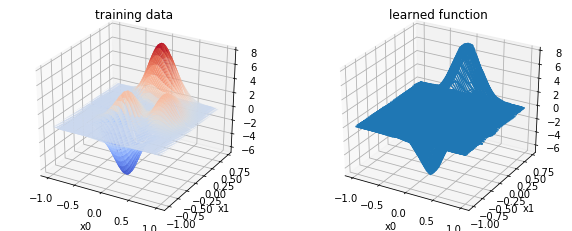

In [5]:
# plotting
y_pred = regr.predict(X_norm)
n_rt = np.sqrt(n_train).astype(int) 
X = np.zeros((n_rt, n_rt))
Y = np.zeros((n_rt, n_rt))
Z_true = np.zeros((n_rt, n_rt))
Z_pred = np.zeros((n_rt, n_rt))
for i in range(n_rt):
    for j in range(n_rt):
        X[i, j] = X_norm[i * n_rt + j, 0]
        Y[i, j] = X_norm[i * n_rt + j, 1]
        Z_true[i, j] = y_norm[i * n_rt + j]
        Z_pred[i, j] = y_pred[i * n_rt + j]

fig = plt.figure(figsize=plt.figaspect(0.4))
ax = fig.add_subplot(1, 2, 1, projection='3d')
cmap = plt.get_cmap('coolwarm')
ax.plot_surface(X, Y, Z_true, cmap=cmap)
ax.set_title('training data')
ax.set_xlabel('x0')
ax.set_ylabel('x1')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_wireframe(X, Y, Z_pred)
ax.set_title('learned function')
ax.set_xlabel('x0')
ax.set_ylabel('x1')
plt.show()


In [6]:
def objective_function(x): 
    return regr.predict(x.reshape(-1,2))

In [7]:
# optimize embedded ANN model with different initial guesses
bnds = Bounds(-1.0, 1.0)
x0 = np.array([0, 0])
solLBD = minimize(objective_function, x0, bounds = bnds, method='L-BFGS-B')
print('local optimum for x0=', x0, 'is : ', solLBD.fun)

x0 = np.array([-0.750, -0.750])
solLBD = minimize(objective_function, x0, bounds = bnds, method='L-BFGS-B')
print('local optimum for x0=', x0, 'is : ', solLBD.fun)

x0 = np.array([-1, -1])
solLBD = minimize(objective_function, x0, bounds = bnds, method='L-BFGS-B')
print('local optimum for x0=', x0, 'is : ', solLBD.fun)

x0 = np.array([0, 1])
solLBD = minimize(objective_function, x0, bounds = bnds, method='L-BFGS-B')
print('local optimum for x0=', x0, 'is : ', solLBD.fun)

x0 = np.array([1, 1])
solLBD = minimize(objective_function, x0, bounds = bnds, method='L-BFGS-B')
print('local optimum for x0=', x0, 'is : ', solLBD.fun)

x0 = np.array([1, -1])
solLBD = minimize(objective_function, x0, bounds = bnds, method='L-BFGS-B')
print('local optimum for x0=', x0, 'is : ', solLBD.fun)

x0 = np.array([0, -0.7])
solLBD = minimize(objective_function, x0, bounds = bnds, method='L-BFGS-B')
print('local optimum for x0=', x0, 'is : ', solLBD.fun)

local optimum for x0= [0 0] is :  [-0.02908517]
local optimum for x0= [-0.75 -0.75] is :  [0.01120344]
local optimum for x0= [-1 -1] is :  [0.01120344]
local optimum for x0= [0 1] is :  [-0.04042995]
local optimum for x0= [1 1] is :  [-0.02908517]
local optimum for x0= [ 1 -1] is :  [-6.89022989]
local optimum for x0= [ 0.  -0.7] is :  [-6.86196617]


We observe that for different initial guesses, we obtain different optimal points. As the optimizers claim to have found an optimal solution, we can conclude that the underlying model is nonconvex and has several local optima. Only by using global optimization, we can guarantee to have computed to actual global minimum.